In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
HOME_WIN = 'home_win'
AWAY_WIN = 'away_win'
DRAW = 'draw'
HOME_GOALS = 'home_goals'
AWAY_GOALS = 'away_goals'

In [4]:
import pandas as pd

# Replace 'your_file.csv' with the actual path to your CSV file
file_path = 'sport_odds_data.csv'
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)

# Now you can work with the DataFrame 'df' as needed
#print(df.head())  


In [5]:
## Filtering only past events

from datetime import datetime

# Convert the "commence_time" column to datetime
df['commence_time'] = pd.to_datetime(df['commence_time'])

# Get the current date without the time component
current_date = datetime.now().date()

# Extract the date component from the "commence_time" column
df['commence_date'] = df['commence_time'].dt.date

# Filter rows where "commence_date" is greater than the current date
filtered_df = df[df['commence_date'] < current_date]

# Drop the temporary "commence_date" column if you don't need it
filtered_df = filtered_df.drop(columns=['commence_date'])

# print(filtered_df)

In [6]:
LOW_ODD_LIMIT = 1.0
UPP_ODD_LIMIT = 4.0 
ODD_STEP_SIZE = 0.2

bins_number = int((UPP_ODD_LIMIT - LOW_ODD_LIMIT) / ODD_STEP_SIZE)

In [7]:
# filtered_df = filtered_df.head(5)
# print(filtered_df)

In [8]:
from odds_accuracy_utils import get_match_outcome, get_bin_index, fill_h2h_bins

bins_labels = []
for i in range(0,bins_number):
    bins_labels.append(f"{round(LOW_ODD_LIMIT + i*ODD_STEP_SIZE, 1)}-{round(LOW_ODD_LIMIT + (i+1)*ODD_STEP_SIZE, 1)}")

bins = []
for i in range (0, bins_number):
    bins.append([])

## Filteirng only head-to-head results
for index, row in filtered_df.iterrows():
    match_score = get_match_outcome(row)
    home_win_odd = float(row[HOME_WIN])
    away_win_odd = float(row[AWAY_WIN])
    draw_odd = float(row[DRAW])
    home_win_bin_index = get_bin_index(LOW_ODD_LIMIT, UPP_ODD_LIMIT, ODD_STEP_SIZE, home_win_odd)
    away_win_bin_index = get_bin_index(LOW_ODD_LIMIT, UPP_ODD_LIMIT, ODD_STEP_SIZE, away_win_odd)
    draw_bin_index = get_bin_index(LOW_ODD_LIMIT, UPP_ODD_LIMIT, ODD_STEP_SIZE, draw_odd)

    bins = fill_h2h_bins(bins, match_score, home_win_bin_index, away_win_bin_index, draw_bin_index
                     , home_win_odd, away_win_odd, draw_odd) 

In [9]:
print(bins)
for i in range(0,len(bins)):
    print(f"Bin n° {i+1} is {len(bins[i])}" )

[[[0.8474576271186441, True], [0.8695652173913044, True], [0.9345794392523364, True], [0.8771929824561404, True], [0.8771929824561404, True], [0.9090909090909091, True]], [[0.7751937984496123, True], [0.7352941176470588, True], [0.8333333333333334, True], [0.7751937984496123, False], [0.7352941176470588, True], [0.7751937984496123, True], [0.8333333333333334, True], [0.8333333333333334, False], [0.7692307692307692, True], [0.819672131147541, False], [0.819672131147541, True], [0.8, True], [0.7692307692307692, True], [0.7407407407407407, True], [0.8, True], [0.8333333333333334, True], [0.7407407407407407, True], [0.7692307692307692, True], [0.7352941176470588, True], [0.7407407407407407, True], [0.7751937984496123, True], [0.7352941176470588, True], [0.819672131147541, True], [0.7518796992481203, False], [0.7692307692307692, True], [0.7751937984496123, True], [0.7407407407407407, True], [0.7407407407407407, False], [0.7692307692307692, True], [0.7751937984496123, False]], [[0.6369426751

In [10]:
odds_accuracies = []

for bin in bins:
    cum_exp_value = 0.
    cum_real_value = 0.
    for element in bin:
        cum_exp_value += element[0]
        if element[1]:
            cum_real_value+=1
    odds_accuracies.append([cum_exp_value, cum_real_value])        

In [11]:
print(odds_accuracies)
print(bins_labels)

[[5.315079157765475, 6.0], [23.28642623716754, 24.0], [33.95913982331513, 31.0], [24.625469729977908, 19.0], [27.632010802983253, 24.0], [22.184763525376127, 18.0], [15.668157645139747, 13.0], [13.864965986394557, 10.0], [12.37407941224735, 13.0], [11.538724685276408, 11.0], [11.150537634408602, 10.0], [13.867569930069932, 14.0], [18.00840336134455, 21.0], [24.873573573573587, 31.0], [12.449392712550619, 11.0]]
['1.0-1.2', '1.2-1.4', '1.4-1.6', '1.6-1.8', '1.8-2.0', '2.0-2.2', '2.2-2.4', '2.4-2.6', '2.6-2.8', '2.8-3.0', '3.0-3.2', '3.2-3.4', '3.4-3.6', '3.6-3.8', '3.8-4.0']


In [12]:
norm_odds_accuracies = []

for element in odds_accuracies:
    if (element[0] != 0): #In case no values exists in the bean, cum_real_value will be 0
        norm_odds_accuracies.append(element[1]/element[0])
    else:
        norm_odds_accuracies.append(1)   

# print(norm_odds_accuracies)    

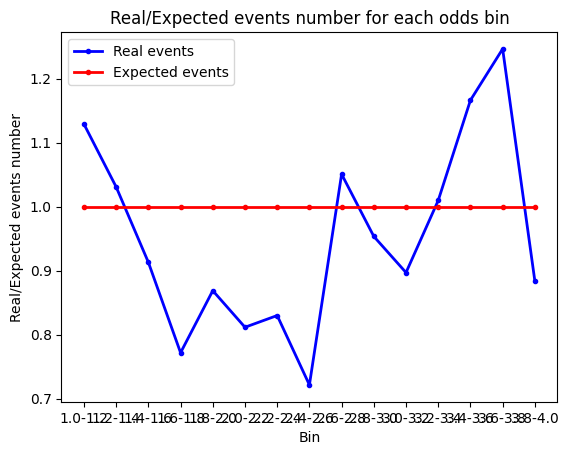

In [13]:
# Create a scatter plot with connecting lines for the first set of data
plt.plot(bins_labels, norm_odds_accuracies, color='blue', marker='.', linestyle='-', linewidth=2, label='Real events')

# Create a scatter plot with connecting lines for the second set of data
plt.plot(bins_labels, np.ones(bins_number), color='red', marker='.', linestyle='-', linewidth=2, label='Expected events')


# Adding labels and title
plt.xlabel('Bin')
plt.ylabel('Real/Expected events number')
plt.title('Real/Expected events number for each odds bin')
plt.legend()

# Show the plot
plt.show()

In [14]:
## Calculate standard deviations

